# 🎭 **Introduction to Deepfakes**

> Deepfakes are synthetic media where a person in an existing image or video is replaced with someone else's likeness. 
>
> Utilizing deep learning models, particularly **Generative Adversarial Networks (GANs)**, deepfakes have become increasingly realistic. 
>
> While they offer creative possibilities in entertainment and art, they also present significant ethical and security challenges, such as **misinformation**, **identity theft**, and **defamation**.

---

## 🚨 **Understanding the Threat of Deepfakes**

The growing sophistication of deepfakes has made it difficult to distinguish **real content** from **fake**. This poses serious risks in various sectors, including **politics**, **finance**, and **personal security**. The potential for misuse raises concerns about the **reliability of visual evidence** in our digital age, making it crucial to develop effective detection methods.


---

## 🧠 **ResNet50 for Deepfake Detection**

**ResNet50**, a convolutional neural network (CNN) with 50 layers, is a powerful tool for **image classification** tasks. Its deep architecture enables it to capture intricate patterns in facial features, making it highly effective for **deepfake detection**. By leveraging ResNet50, we can identify subtle inconsistencies in manipulated images, providing a robust solution for combating deepfake threats.

---

## 🛠️ **Building the Deepfake Classifier**

In this notebook, we implement a deepfake detection model using the **ResNet50** architecture. The model is trained on a dataset containing both **real** and **fake** images, learning to detect the subtle differences that indicate deepfake manipulation. This approach aims to create a **reliable system** for identifying and mitigating the impact of deepfakes.

---

### 💡 **Key Points:**
- **Introduction to Deepfakes**: Understanding the technology and its implications.
- **Threats of Deepfakes**: The risks posed by deepfakes in various domains.
- **ResNet50**: Leveraging advanced CNN architecture for detection.
- **Classifier**: Building a model that can reliably distinguish between real and fake media.



<h2 style="color: Black;">Import The Necessary Library</h2>


In [1]:
import tensorflow as tf
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers  import L2, L1
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

<h2 style="color: BLack;">Data Collection</h2>


In [2]:
train_directory = "/kaggle/input/deepfake-and-real-images/Dataset/Train"
val_directory = "/kaggle/input/deepfake-and-real-images/Dataset/Validation"

In [3]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE":224,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 10,
    "DROPOUT_RATE": 0.05,
    "REGULARIZATION_RATE": 0.001,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 2,
    "PATCH_SIZE": 32,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["Fake","Real"]
}

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True
)

Found 140002 files belonging to 2 classes.


In [5]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 39428 files belonging to 2 classes.


<h2 style="color: black;">Pre-Fetch The Data For The Training Process</h2>


In [6]:
training_dataset = (
    train_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [7]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

<h2 style="color: black;">Model Building</h2>


In [8]:
input_shape = (224, 224, 3)
# Load the EfficientNetB0 model, excluding the top layers (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the base model
base_model.trainable = False

# Create a Sequential model and add layers
model = models.Sequential()

# Add the EfficientNet base model
model.add(base_model)

# Add a global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dropout layer for regularization
model.add(layers.Dropout(0.5))

# Add a dense layer with softmax activation for classification
model.add(layers.Dense(CONFIGURATION["NUM_CLASSES"], activation = "sigmoid"))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
loss_function = BinaryCrossentropy()

In [10]:
model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,metrics=['accuracy']
)

<h2 style="color: black;">Model Training</h2>


In [11]:
history =model.fit(
  training_dataset,
  validation_data = validation_dataset,
  batch_size= CONFIGURATION["BATCH_SIZE"],

  epochs = CONFIGURATION["N_EPOCHS"],
  verbose = 1
)

Epoch 1/10


I0000 00:00:1725510298.498879      73 service.cc:145] XLA service 0x7b6cac010680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725510298.498937      73 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725510298.498945      73 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   4/4376 ━━━━━━━━━━━━━━━━━━━━ 3:18 45ms/step - accuracy: 0.4661 - loss: 0.7386

I0000 00:00:1725510320.430028      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 486s 104ms/step - accuracy: 0.7367 - loss: 0.5253 - val_accuracy: 0.7977 - val_loss: 0.4361
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 368s 84ms/step - accuracy: 0.7616 - loss: 0.4876 - val_accuracy: 0.7941 - val_loss: 0.4410
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 367s 84ms/step - accuracy: 0.7627 - loss: 0.4866 - val_accuracy: 0.7959 - val_loss: 0.4398
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 430s 98ms/step - accuracy: 0.7641 - loss: 0.4857 - val_accuracy: 0.7958 - val_loss: 0.4401
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 421s 96ms/step - accuracy: 0.7613 - loss: 0.4866 - val_accuracy: 0.7982 - val_loss: 0.4363
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 397s 91ms/step - accuracy: 0.7644 - loss: 0.4852 - val_accuracy: 0.7955 - val_loss: 0.4389
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 361s 82ms/step - accuracy: 0.7614 - loss: 0.4860 - val_accuracy: 0.7938 - val_loss: 0.4415
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 374s 85ms/step - accuracy: 0.7639 - l

<h2 style="color: black;">Visualization Of The Loss</h2>


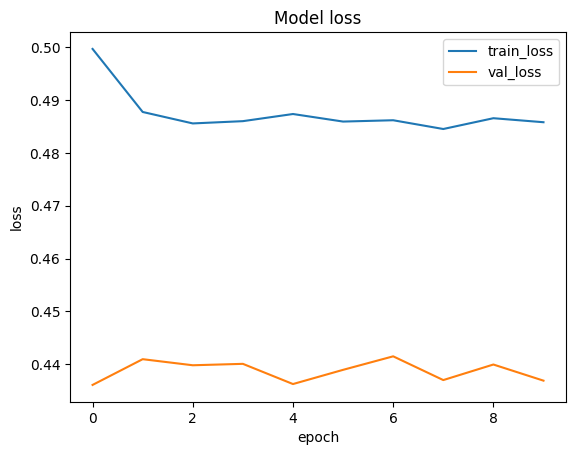

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

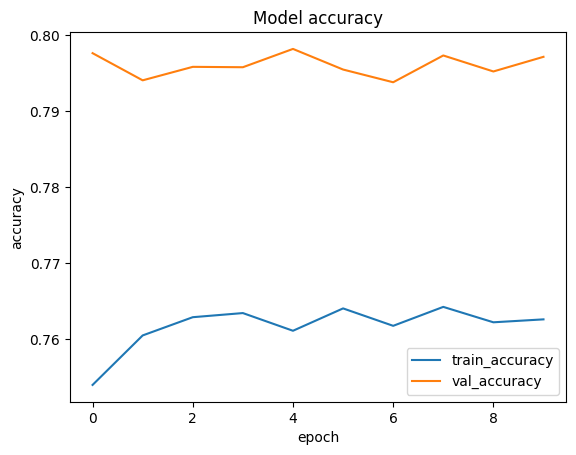

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

<h2 style="color: black;">Test The Model</h2>


In [14]:
TESTDATA='/kaggle/input/deepfake-and-real-images/Dataset/Test'

In [15]:
import tensorflow as tf

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TESTDATA,  # Replace with your test data directory
    image_size=(224, 224),  # Image size should match the input shape of your model
    batch_size=32,  # Batch size
    shuffle=False  # Ensure the data is not shuffled
)

Found 10905 files belonging to 2 classes.


In [16]:
class_names = test_dataset.class_names
print(class_names)

['Fake', 'Real']


In [17]:
# Predict using the model
y_pred = model.predict(test_dataset)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

341/341 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step


In [18]:
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

y_true = tf.convert_to_tensor(y_true)

In [19]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4570  922]
 [2247 3166]]


<h2 style="color: black;">Confusion Matrix</h2>


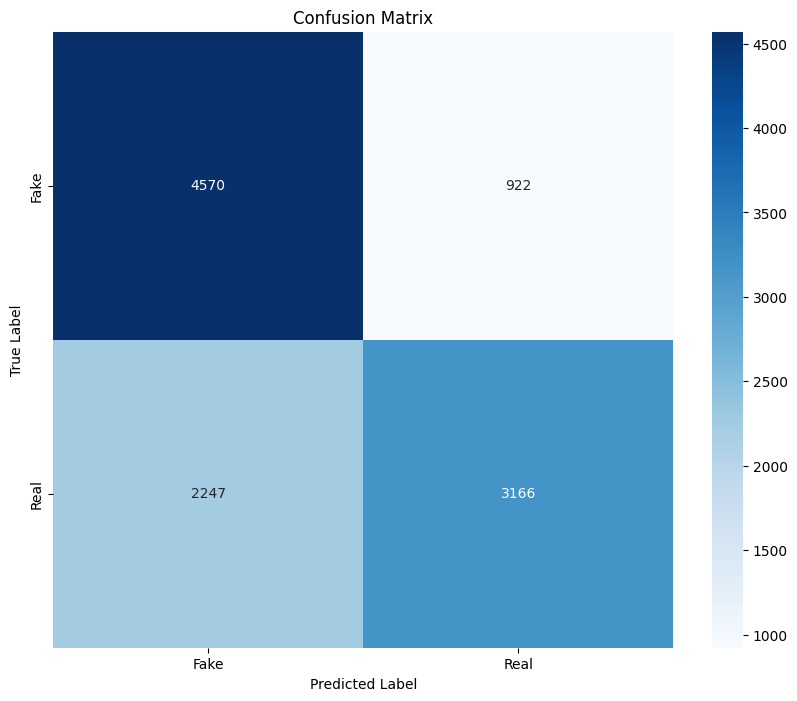

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<h2 style="color: black;">Save The Model</h2>


In [21]:
model.save('deepfake.h5')